# AIM : Implementation of Linear Regression for House Price Prediction
**Name : Trideep Nandi**

**Class : CS4**

**Batch: 2**

**Enrollment : 0827CS211248**

## Step 1 Importing Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

## Step 2 Importing CSV File

head() function displays the first few records of the dataset.

In [ ]:
df = pd.read_csv("/content/Real-estate1.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Here the drop function will drop the whole "No" column and gives the remaining dataset as the output.

In [ ]:
df.drop('No',inplace=True,axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


df.columns will show the columns currently present in the dataset.

In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

## Step 3: Create a scatterplot to visualize data

* The code sns.scatterplot(x="X2 house age",y="Y house price of unit area",data=df) generates a scatter plot using the seaborn library, with "X2 house age" as the x-axis and "Y house price of unit area" as the y-axis, using the data from the DataFrame df. 

* **Scatterplot Definition and Use Cases:**  

    **Definition:** A scatter plot (also known as a scatter diagram) is a two-dimensional graphical representation of a set of data. Each observation (or point) in a scatter plot represents two pieces of data, with the value of one variable being plotted against another.  
  
    **Use Cases:**
  
    * Scatter plots are used to observe relationships between variables. If the points on the scatter plot seem to form a line, it indicates a linear relationship between the variables.
    * They are useful for interpreting trends in statistical data. By observing how the data points are scattered on the plot, we can infer the type of correlation.
    * Scatter plots can also be used to observe distribution, clusters and outliers in the data.
    * In machine learning, scatter plots can be used to visualize the spread of data and to make initial observations before applying different algorithms.

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

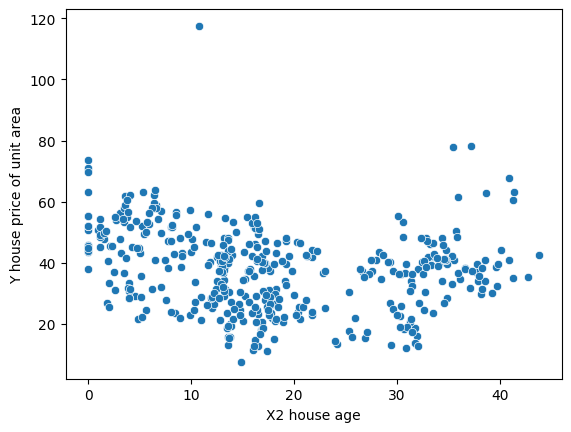

In [ ]:
sns.scatterplot(x="X2 house age",y="Y house price of unit area",data=df)

## Step 4: Create Feature variables

This code is creating two variables, X and y, from a DataFrame df. X is a new DataFrame that contains all the columns of df except "Y house price of unit area". y is a Series that contains only the "Y house price of unit area" column from df. The print(X) and print(y) lines are then displaying these new variables.

In [ ]:
X = df.drop("Y house price of unit area",axis=1)
y = df["Y house price of unit area"]
print(X)
print(y)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

## Step 5: Split data into train and test sets

The first line splits the DataFrame df into training and testing sets, with 70% data for training and 30% for testing. 

The second line displays the X_train DataFrame, which contains the training data for the features.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
266,2013.250,17.8,1783.18000,3,24.96731,121.51486
298,2013.333,16.7,4082.01500,0,24.94155,121.50381
274,2013.167,27.5,394.01730,7,24.97305,121.53994
355,2013.250,3.8,383.86240,5,24.98085,121.54391
321,2012.917,16.9,964.74960,4,24.98872,121.53411
...,...,...,...,...,...,...
63,2013.583,2.6,533.47620,4,24.97445,121.54765
326,2013.500,4.1,56.47425,7,24.95744,121.53711
337,2012.833,31.3,600.86040,5,24.96871,121.54651
11,2013.333,6.3,90.45606,9,24.97433,121.54310


X_test is a DataFrame that contains the testing data for the features from the original DataFrame df. It was created using the train_test_split function from sklearn.model_selection, with 30% of the data from df allocated for testing. This data will be used to test the performance of the trained model.

In [ ]:
X_test

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
176,2012.833,13.9,4573.7790,0,24.94867,121.49507
347,2013.583,17.4,6488.0210,1,24.95719,121.47353
307,2012.833,10.3,3079.8900,0,24.95460,121.56627
299,2013.167,33.2,121.7262,10,24.98178,121.54059
391,2013.583,6.2,1939.7490,1,24.95155,121.55387
...,...,...,...,...,...,...
16,2013.250,0.0,292.9978,6,24.97744,121.54458
31,2012.750,29.6,769.4034,7,24.98281,121.53408
36,2012.917,14.7,1935.0090,2,24.96386,121.51458
41,2013.500,16.8,4066.5870,0,24.94297,121.50342


y_train is a Series that contains the training data for the target variable from the original DataFrame df. It was created using the train_test_split function from sklearn.model_selection, with 70% of the data from df allocated for training. This data will be used to train the model.

In [ ]:
y_train

266    23.7
298    16.7
274    41.0
355    60.7
321    37.7
       ... 
63     55.0
326    62.1
337    30.9
11     58.1
351    28.6
Name: Y house price of unit area, Length: 289, dtype: float64

y_test is a Series that contains the testing data for the target variable from the original DataFrame df. It was created using the train_test_split function from sklearn.model_selection, with 30% of the data from df allocated for testing. This data will be used to evaluate the performance of the trained model.


In [ ]:
y_test

176    19.2
347    11.2
307    24.7
299    46.1
391    31.3
       ... 
16     70.1
31     25.0
36     22.9
41     18.2
24     38.8
Name: Y house price of unit area, Length: 125, dtype: float64

## Step 6: Creating a linear regression model

This line of code is creating an instance of the LinearRegression class from the sklearn.linear_model module. This instance, named model, will be used to apply the linear regression algorithm to a set of data. The LinearRegression class is a predictive modeling technique which assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X).

In [ ]:
model = LinearRegression()

## Step 7: Fitting the model with training data




The line model.fit(X_train,y_train) is where the actual training of the linear regression model happens. The fit method takes the training data X_train and y_train as arguments and adjusts the model's parameters to minimize the cost function. This is done using an optimization algorithm. The X_train is the features for the training data and y_train is the target variable for the training data. After this line, the model is ready to make predictions.

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

## Step 8: Making predictions for test data

The line predictions = model.predict(X_test) is using the trained linear regression model to make predictions on the testing data X_test. The predict method takes the testing data X_test as an argument and returns the predicted values based on the model's parameters. These predicted values are stored in the predictions variable.  

The second line predictions simply displays the predicted values.

In [ ]:
predictions = model.predict(X_test)
predictions

array([12.63830383, 10.0304461 , 22.98807375, 48.50264837, 32.67140451,
       37.82572669, 36.09178068, 41.05953639, 47.84830793, 40.4574746 ,
       45.0361603 , 32.86533457, 40.48623576, 36.48827849, 44.30595729,
       46.59668235, 38.42798244, 44.26307337, 48.81959723, 45.50409246,
       42.23260833, 54.6526397 , 48.07373298, 37.48194231, 33.57091525,
       48.26293154, 40.23479801, 50.42675437, 47.22333423, 38.99458517,
       48.11033139, 40.47035604, 45.61060308, 43.98441528, 46.54336092,
        8.18725886, 38.08375879, 39.82608171,  8.5339677 , 55.72740213,
       32.17950939, 49.72698264, 24.85604948, 47.64473233, 41.23026871,
       51.17703175, 42.04716292, 37.32689765, 44.24427856, 36.27028988,
       47.55408451, 34.74054504, 43.53329366, 15.95586215, 38.29001222,
       48.93912385, 44.69790471, 44.91934627, 45.33972278, 41.33035787,
       34.39899173, 44.02303164, 41.99940522, 43.9553153 , 53.61420366,
       44.24994361, 24.68926603, 47.06140631, 31.22031534, 40.49

## Step 9: Calculating error

The line mean_squared_error(y_test,predictions) is used to calculate the Mean Squared Error (MSE) between the actual output (y_test) and the predicted output (predictions). The mean_squared_error function is from the sklearn.metrics module.  MSE is a common metric used for regression models which measures the average squared difference between the actual and predicted values. It's a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.  In the context of your code, this line is calculating the MSE of your Linear Regression model's predictions on the test data. The result, 46.21179783492909, indicates the average squared difference between the actual and predicted house prices.

In [ ]:
mean_squared_error(y_test,predictions)

46.21179783492909

The line mean_absolute_error(y_test,predictions) is used to calculate the Mean Absolute Error (MAE) between the actual output (y_test) and the predicted output (predictions). The mean_absolute_error function is from the sklearn.metrics module.  MAE is a measure of errors between paired observations expressing the same phenomenon. It's an average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were. The measure gives an equal weight to all errors, whether they are big or small. Unlike the Mean Squared Error, the MAE needs no square root to be understood, as it's in the same unit as the input data.  In the context of your code, this line is calculating the MAE of your Linear Regression model's predictions on the test data. The result, 5.392293684756193, indicates the average absolute difference between the actual and predicted house prices.

In [ ]:
mean_absolute_error(y_test,predictions)

5.392293684756193